<a href="https://colab.research.google.com/github/FaceMatch2025/FaceMatch/blob/main/FaceMatchFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install deepface     #Download the openface model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.6 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=135ce89e3e078b9bd8a70d9adca80f6a7c95a12565fe0df5ffd44308a2d3824d
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire


In [2]:
# Import necessary libraries
from IPython import get_ipython
from IPython.display import display, Image # Import Image for displaying thumbs up/down
from google.colab import drive
import os
import cv2
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from deepface import DeepFace

# Mount Google Drive to access files
drive.mount('/content/drive', force_remount=True)

25-01-12 10:40:01 - Directory /root/.deepface has been created
25-01-12 10:40:01 - Directory /root/.deepface/weights has been created
Mounted at /content/drive


25-01-12 10:40:53 - openface_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/openface_weights.h5
To: /root/.deepface/weights/openface_weights.h5
100%|██████████| 15.3M/15.3M [00:00<00:00, 30.6MB/s]


Similarity Scores:
GINTZ_ROMAIN_06112004: 0.04
BRUN_KARL_13122004: 0.72
ETIEVANT_THOMAS_21102003: 0.64
HUCK_ALBAN_19082004: 0.53
GAUER_ALOYSE_17052004: 0.67
WERNER_VALENTIN_23012004: 0.49


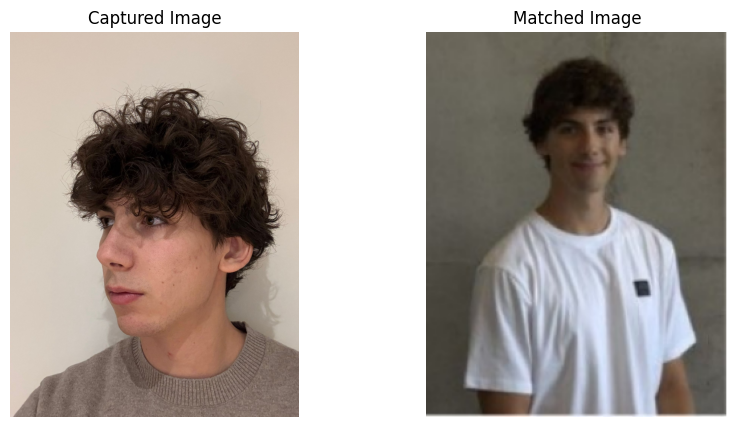

Brun Karl is 20 years old (13122004). He is allowed to buy alcohol.


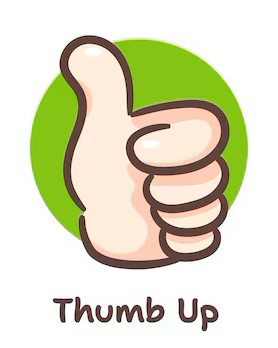

In [3]:
# Define paths for database, captured image, and thumbs up/down images
database_path = '/content/drive/MyDrive/proim/trombi'  # Path to the database of faces
captured_image_path = '/content/drive/MyDrive/proim/cam/imagecam.jpg'  # Path to the captured image
thumbs_up_path = "/content/drive/MyDrive/thumbs_up.jpg" # Path to thumbs up image (replace with your path)
thumbs_down_path = "/content/drive/MyDrive/thumbs_down.jpg"  # Path to thumbs down image (replace with your path)

# Function to load database images with their paths
def load_database_images_paths(database_path):
    database = {}
    for root, _, files in os.walk(database_path):
        for filename in files:
            if filename.endswith((".jpg", ".png")):  # Check if the file is an image
                filepath = os.path.join(root, filename)
                person_name = os.path.splitext(filename)[0]  # Get person's name from filename
                database[person_name] = filepath  # Store the file path in the database
    return database

# Function to calculate age from birthdate string (DDMMYYYY format)
def calculate_age(birthdate_str):
    birthdate = datetime.strptime(birthdate_str, "%d%m%Y")  # Convert string to datetime object
    today = datetime.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

# Function to compare captured image with database using OpenFace
def compare_with_database_openface(database, captured_image_path):
    best_match = None
    highest_similarity = 0
    all_scores = {}

    for person_name, db_image_path in database.items():  # Iterate through database images
        try:
            result = DeepFace.verify(
                img1_path=captured_image_path,
                img2_path=db_image_path,
                model_name="OpenFace",
                enforce_detection=False,
            )
            similarity = result["distance"]  # Get similarity distance (lower is better)
            all_scores[person_name] = 1 - similarity  # Store similarity score

            if similarity < (1 - highest_similarity):  # Update best match if higher similarity found
                highest_similarity = 1 - similarity
                best_match = person_name

        except ValueError as e:  # Handle errors during comparison
            print(f"Error comparing with {person_name}: {e}")
            all_scores[person_name] = 0

    # Check if all scores are below a threshold (e.g., 0.1) to consider as no match
    if all(score < 0.1 for score in all_scores.values()):
        print("Sorry, you are not registered in our system. Would you like to identify?")
        return None, 0, all_scores  # Return None to indicate no match

    # Return the best match regardless of the threshold
    return best_match, highest_similarity, all_scores

# Load database images with paths
database = load_database_images_paths(database_path)

# Compare captured image with database
matched_person, similarity_score, all_scores = compare_with_database_openface(database, captured_image_path)

# Print similarity scores for all images
print("Similarity Scores:")
for person_name, score in all_scores.items():
    print(f"{person_name}: {score:.2f}")

# Display results and thumbs up/down based on age
if matched_person:
    birthdate_str = matched_person.split('_')[-1]  # Extract birthdate from filename
    age = calculate_age(birthdate_str)  # Calculate age
    person_name_formatted = ' '.join(matched_person.split('_')[:-1]).title()  # Format person's name
    adult_or_minor = "major" if age >= 18 else "not major"  # Determine if major or minor
    allowed_to_drink = "allowed" if age >= 18 else "not allowed"  # Determine if allowed to drink

    # Display matched images
    captured_image = cv2.imread(captured_image_path)
    database_image = cv2.imread(database[matched_person])

    # Convert images to RGB for display
    captured_image = cv2.cvtColor(captured_image, cv2.COLOR_BGR2RGB)
    database_image = cv2.cvtColor(database_image, cv2.COLOR_BGR2RGB)

    # Display images using Matplotlib
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(captured_image)
    axes[0].set_title("Captured Image")
    axes[0].axis('off')
    axes[1].imshow(database_image)
    axes[1].set_title("Matched Image")
    axes[1].axis('off')
    plt.show()


    # Print formatted output message
    print(f"{person_name_formatted} is {age} years old ({birthdate_str}). He is {allowed_to_drink} to buy alcohol.")

    # Display thumbs up/down image based on age
    if age >= 18:
        display(Image(thumbs_up_path))  # Display thumbs up if major
    else:
        display(Image(thumbs_down_path))  # Display thumbs down if minor
else:
    print("Identification process cancelled or not registered.")

# Display captured image if no match found
if not matched_person:
    captured_image_display = cv2.imread(captured_image_path)
    if captured_image_display is not None:
        captured_image_display = cv2.cvtColor(captured_image_display, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(5, 5))
        plt.imshow(captured_image_display)
        plt.title("Captured Image")
        plt.axis('off')
        plt.show()
    else:
        print(f"Error: Could not load image from {captured_image_path}. Please check the file path and permissions.")